<a href="https://colab.research.google.com/github/SantiagoVillamizar/Est.PARCIAL-/blob/main/Copia_de_EST_PARCIAL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving nac2022.csv to nac2022.csv


In [ ]:
import pandas as pd
import io
io_csv = io.BytesIO(uploaded['nac2022.csv'])
tabla = pd.read_csv(io_csv, sep = ",",quotechar='"', index_col= 0, encoding='latin-1')
# Mostrar las primeras 3 filas
tabla.head(3)

<ipython-input-2-deee44c6640a>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io_csv, sep = ",",quotechar='"', index_col= 0, encoding='latin-1')


,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
8,638,1,1,NaN,1,4,4,2022,12,1,...,2,12/10/2015,2,2,2.0,29,3,8,1.0,1
11,1,1,1,NaN,1,6,5,2022,12,1,...,2,12/09/2012,2,1,1.0,24,4,11,1.0,1
27,1,1,1,NaN,2,6,5,2022,12,1,...,4,14/03/2019,4,2,2.0,25,3,9,1.0,1


In [ ]:
df = tabla[["EDAD_PADRE", "EDAD_MADRE", "N_HIJOSV"]]
df.head(4)


,EDAD_PADRE,EDAD_MADRE,N_HIJOSV
COD_DPTO,,,
8,29,3,2
11,24,5,2
27,25,3,4
8,29,4,2


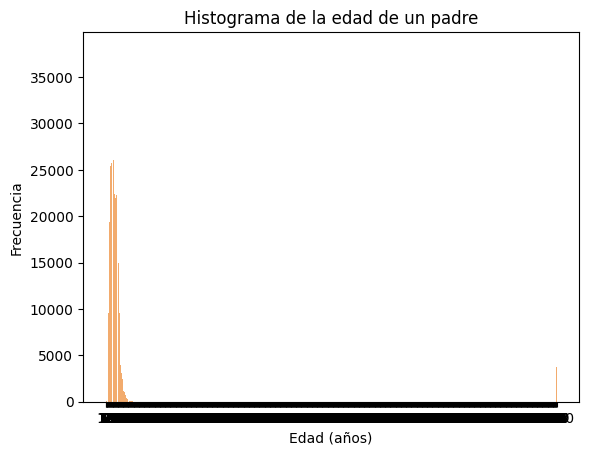

In [ ]:
import matplotlib.pyplot as plt

# Agregamos un paso de 1 para que range funcione correctamente
intervalos = range(min(df['EDAD_PADRE']), max(df['EDAD_PADRE']) + 2, 1)

plt.hist(df['EDAD_PADRE'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de la edad de un padre')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()


El histograma muestra un pico muy pronunciado en las edades más jóvenes, lo que indica que la mayoría de los padres al momento del nacimiento de sus hijos se encuentran en ese rango. Esto es consistente con la tendencia nacional de que la paternidad en Colombia se da principalmente entre los 20 y 35 años.

Por otro lado, parece que el histograma presenta un problema de visualización del eje X (posiblemente por un exceso de categorías o por un error al graficar), lo que impide identificar claramente la distribución completa. Es probable que el dataset contenga valores atípicos o mal digitados (por ejemplo, edades extremadamente altas como 99 o 100 años), lo cual distorsiona la escala y comprime las frecuencias válidas hacia un solo extremo.


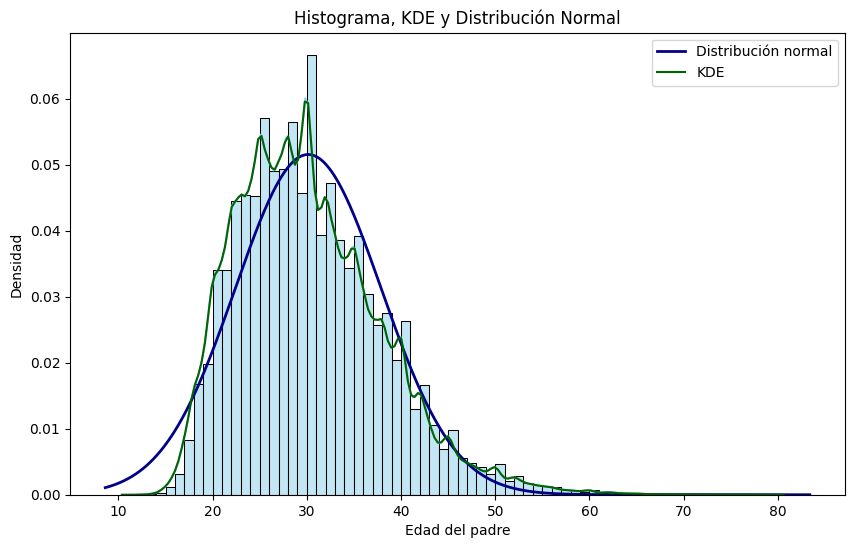

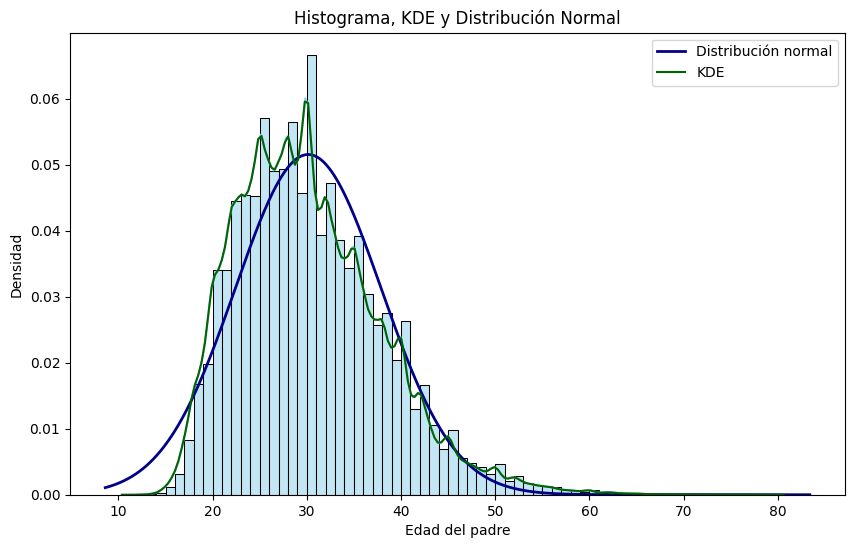

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import norm

# Filtrado del DataFrame
df1 = df[(df['EDAD_PADRE'] <= 100) & (df['EDAD_MADRE'] != 99) & (df['N_HIJOSV'] != 99)]

# Intervalos para el histograma
intervalos1 = range(min(df1['EDAD_PADRE']), max(df1['EDAD_PADRE']) + 2)

# Crear la figura
plt.figure(figsize=(10, 6))

# Histograma con KDE
sns.histplot(x=df1['EDAD_PADRE'], bins=intervalos1, kde=True, stat='density',
             color='skyblue', edgecolor='black')

# Parámetros para la curva de distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1['EDAD_PADRE']), np.std(df1['EDAD_PADRE']))

# Graficar distribución normal
plt.plot(x, p, linewidth=2, color="darkblue", label='Distribución normal')

# KDE adicional con otro color
sns.kdeplot(x=df1['EDAD_PADRE'], color="darkgreen", label='KDE')

# Etiquetas y título
plt.title('Histograma, KDE y Distribución Normal')
plt.xlabel('Edad del padre')
plt.ylabel('Densidad')
plt.legend()

# Mostrar gráfica
plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Filtrado del DataFrame
df1 = df[(df['EDAD_PADRE'] <= 100) & (df['EDAD_MADRE'] != 99) & (df['N_HIJOSV'] != 99)]

# Intervalos para el histograma
intervalos1 = range(min(df1['EDAD_PADRE']), max(df1['EDAD_PADRE']) + 2)

# Crear la figura
plt.figure(figsize=(10, 6))

# Histograma con KDE
sns.histplot(x=df1['EDAD_PADRE'], bins=intervalos1, kde=True, stat='density',
             color='skyblue', edgecolor='black')

# Parámetros para la curva de distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1['EDAD_PADRE']), np.std(df1['EDAD_PADRE']))

# Graficar distribución normal
plt.plot(x, p, linewidth=2, color="darkblue", label='Distribución normal')

# KDE adicional con otro color
sns.kdeplot(x=df1['EDAD_PADRE'], color="darkgreen", label='KDE')

# Etiquetas y título
plt.title('Histograma, KDE y Distribución Normal')
plt.xlabel('Edad del padre')
plt.ylabel('Densidad')
plt.legend()

# Mostrar gráfica
plt.show()


**El histograma (barras azules)** muestra cómo se distribuye la edad de los padres en el momento en que nacen sus hijos. La mayoría de los padres se encuentran entre los 20 y 35 años, con un pico notable alrededor de los 30 años.

**La curva KDE (línea verde)** representa la estimación de la densidad de probabilidad de la muestra. Aunque no es completamente simétrica, tiene una cola más larga hacia la derecha, lo que sugiere una asimetría positiva (es decir, una distribución sesgada hacia la derecha). Esto significa que, aunque la mayoría de los padres son jóvenes, también hay algunos que se convierten en padres a edades más avanzadas, entre 40 y 60 años, e incluso más.

Por último, **la curva de distribución normal (línea azul)** ilustra la distribución teórica que esperaríamos si los datos fueran perfectamente normales (simétricos). La curva azul es más "redondeada" y centrada en comparación con la verde, lo que indica que la edad real de los padres no se ajusta exactamente a una distribución normal, aunque se le asemeja.


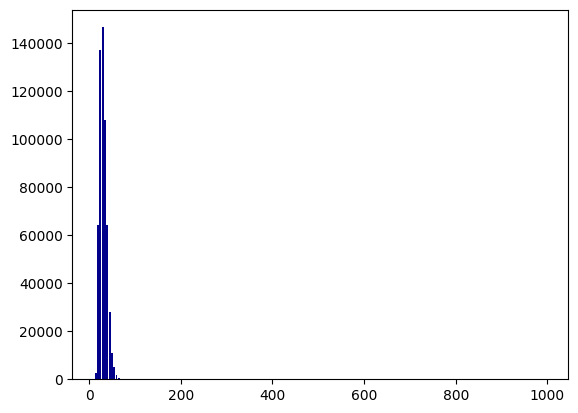

In [ ]:
import matplotlib.pyplot as plt


intervalos = range(min(df['EDAD_PADRE']), max(df['EDAD_PADRE']) + 1, 5)

plt.hist(df.EDAD_PADRE, bins=intervalos, color='darkblue', rwidth=0.85)

plt.show()


In [ ]:
df1 = df[(df['EDAD_PADRE'] < 120) & (df['EDAD_MADRE'] != 99) & (df['N_HIJOSV'] != 99)]
df1.head(5)


,EDAD_PADRE,EDAD_MADRE,N_HIJOSV
COD_DPTO,,,
8,29,3,2
11,24,5,2
27,25,3,4
8,29,4,2
76,21,3,1


<ipython-input-8-7c0cb496162b>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color="darkblue")


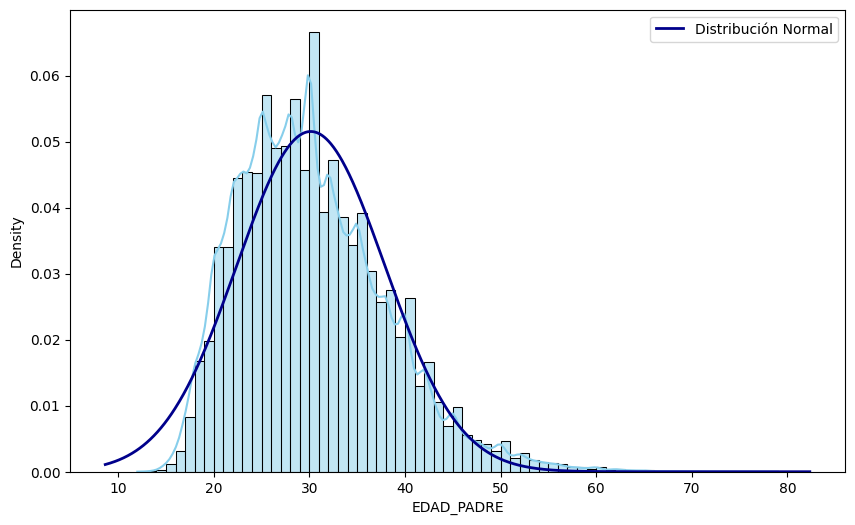

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plt.figure(figsize=(10, 6))

sns.histplot(x=df1.EDAD_PADRE, bins=intervalos1, kde=True, stat='density', color='skyblue', edgecolor='black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)


p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))


plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color="darkblue")

plt.legend()
plt.show()


**Distribución asimétrica a la derecha:** Aunque se ha ajustado una distribución normal (línea azul), el histograma revela una asimetría positiva, lo que indica que hay una mayor concentración de padres en el rango de 20 a 35 años, mientras que se observan algunos casos menos comunes de padres que tienen 40, 50 o incluso más años.

In [ ]:
from scipy.stats import shapiro
shapiro(df1.EDAD_PADRE)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568276.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9627148118717348), pvalue=np.float64(1.919587188982723e-116))

En este caso, se tiene que pvalue = $1.919587188982723 \times 10^{-116 } $ < $0.5$, es decir se rechaza la hipótesis nula por lo que la variable aleatoria X no presenta distribución normal.

In [ ]:
df1.EDAD_PADRE.count()
len(df1.EDAD_PADRE)

568276

In [ ]:
idx = np.random.randint(0, len(df1.EDAD_PADRE), size=100)
shapiro(df1.EDAD_PADRE.iloc[idx])


ShapiroResult(statistic=np.float64(0.9547367134681979), pvalue=np.float64(0.001724970036780085))

Dado que p = $0.001724970036780085$ < 0.05, entonces se rechaza el hecho de que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta normalidad.

<Axes: ylabel='EDAD_PADRE'>

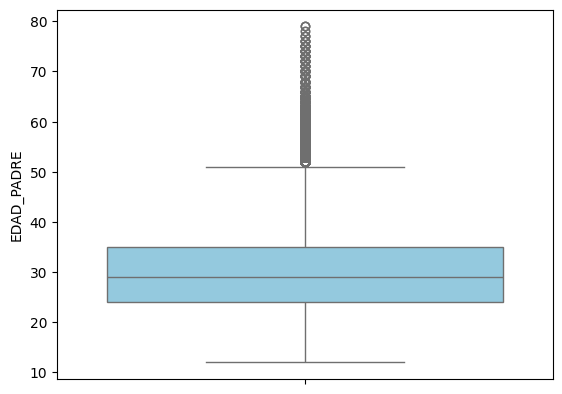

In [ ]:
sns.boxplot(df1.EDAD_PADRE, color='skyblue', saturation=0.75)

En el diagrama de cajas y bigotes se puede observar que la mediana esta entre 15 y 35 años, es decir, que la mitad de las edades de los padres de un recien nacido en colombia estan entre las edades mencionadas.

Los padres de los recien nacidos con edades mayores a 50 años son conciderados casos atipicos dentro del diagrama. En resumen, la mayoria de la edades de los padres de un recien nacido en colombia son edades que no llegan a la tercera edad, mientras que un grupo no tan grande de padres si llegan a tomar edades de la tercera edad.

In [ ]:
plt.figure(figsize=(5, 5))
fig = px.strip(df1.EDAD_PADRE, orientation = "h")
fig.show()

NameError: name 'px' is not defined

<Figure size 500x500 with 0 Axes>

Como se observa en el diagrama de puntos, la dispersión de la edad de un padre de un recién nacido en Colombia está entre el intervalo [0-80] y hay una alta variabilidad entre las edades. Por un lado, hay una baja dispersión entre los 20 y 50 años, lo que indica que la mayoría de los padres en el conjunto de datos se encuentra entre estas edades.

Por otro lado, la mayor dispersión de mis datos puede observarse en los años mayores a 70, es decir, hay una menor presencia de personas mayores en el conjunto de datos. También hay casos poco frecuentes en edades jóvenes menores a 16 años, lo que nos lleva a considerar esos datos como casos atípicos.

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

def calcular_estadisticas(datos):
  media = np.mean(datos)
  varianza = np.var(datos)
  asimetria = skew(datos)
  curtosis = kurtosis(datos)
  return media, varianza, asimetria, curtosis

media, varianza, asimetria, curtosis = calcular_estadisticas(df1.EDAD_PADRE)

print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Asimetría: {asimetria}")
print(f"Curtosis: {curtosis}")

Media: 30.148239587805925
Varianza: 59.92624560757446
Asimetría: 0.7932649439125867
Curtosis: 0.8974620245423521




*  Que la media de las edades de un padre de un recién nacido en Colombia sea de **30,1 años** aproximadamente, me dice que el promedio de las edades es de 30 años. Esto no necesariamente indica que la mayoría de las edades registradas sean de 30 años, sino que es un valor promedio para la distribución.
*   Que el coeficiente de asimetría toma un valor de **0,80** aproximadamente, por lo que es mayor a cero esto indica que la distribución de la edad de un padre de un recien nacido en colombia esta sesgada hacia la derecha, es decir, que la media es mayor que la moda de la variable aleatoria.

*   Que la curtosis tome un valor de **0,90** aproximadamente, y que sea menor estricta que tres, me dice que la curtosis es platicúrtica y presenta un bajo apuntamiento con respecto a la media aritmética. Esto indica que las edades de un padre de un recién nacido en Colombia que están más cerca de la media aritmética están menos concentradas en comparacion con el resto de edades.




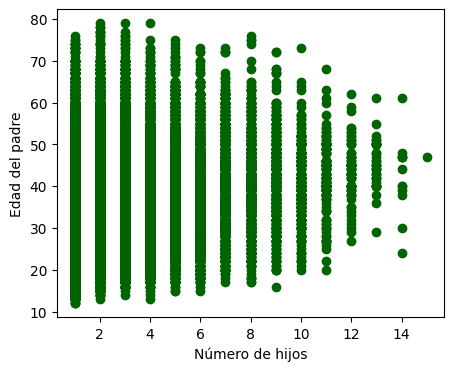

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_HIJOSV"], df1["EDAD_PADRE"], color="darkgreen", marker="o")
plt.xlabel("Número de hijos")
plt.ylabel("Edad del padre")
plt.show()


Aunque existan algunos puntos sin un patrón específico dentro del gráfico, en el diagrama de dispersión se puede observar una ligera correlación negativa, esto quiere decir en el ejemplo que el número de hijos de un padre en Colombia aumenta ligeramente a medida que la edad del padre disminuye, generando una ligera relación entre la edad de un padre y la cantidad de hijos de este.

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(np.array(df1.N_HIJOSV).reshape(-1, 1), np.array(df1["EDAD_PADRE"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(df1.N_HIJOSV).reshape(-1, 1))
predi_lineal


array([[30.29315726],
       [30.29315726],
       [34.62354964],
       ...,
       [30.29315726],
       [32.45835345],
       [30.29315726]])

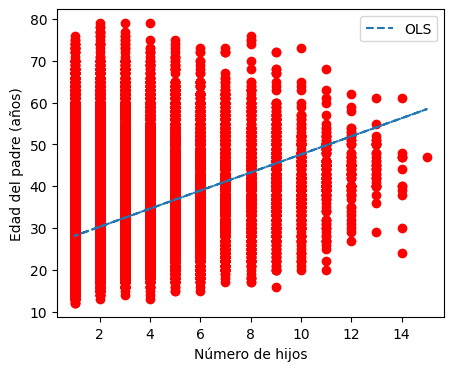

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_HIJOSV"], df1["EDAD_PADRE"], color="red", marker="o")
plt.plot(df1["N_HIJOSV"], predi_lineal, linestyle='--', label="OLS")
plt.xlabel('Número de hijos')
plt.ylabel('Edad del padre (años)')
plt.legend()
plt.show()


Conforme con la recta de regresión, se puede observar una correlación positiva, pues la línea ajustada azul muestra gráficamente que entre más aumente la edad de un padre en Colombia, entonces la cantidad de hijos del padre también va a aumentar en comparación con los padres con edades tempranas.

In [ ]:
from scipy.stats import spearmanr, kendalltau

coef_person = np.corrcoef(df1["N_HIJOSV"], df1["EDAD_PADRE"])[0, 1]
coef_spearman, _ = spearmanr(df1["N_HIJOSV"], df1["EDAD_PADRE"])
coef_kendall, _ = kendalltau(df1["N_HIJOSV"], df1["EDAD_PADRE"])

print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_person}, {coef_spearman} y {coef_kendall}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3308429858965031, 0.3563003702777745 y 0.28081560831586566.


Dado que los coeficientes de correlación de **Pearson, Spearman y Kendall** son aproximadamente 0.33, 0.35 y 0.28 respectivamente (valores que se encuentran entre 0.2 y 0.4, y moderadamente cercanos a 1) se puede afirmar que existe una correlación positiva débil entre las variables: la edad del padre y el número de hijos de un padre en Colombia. Esta correlación positiva sugiere que, en general, señala que la edad de un padre en Colombia depende directamente del número de hijos que el padre tenga, aunque la relación no es muy fuerte. Es decir, que la edad de un padre en Colombia está ligeramente correlacionada con la cantidad de hijos que tiene.


